# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
# -- MY CODE HERE --
# data.isna().any().any()
data.isna().sum()
# в данных есть пропуски в колонках keyword и location

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
data = data.fillna("")
data

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


In [ ]:
data.isna().sum()
# теперь в данных пропусков нет

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [ ]:
# -- MY CODE HERE --
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

In [ ]:
print(round(train[train['target']==1].shape[0] / (train["target"].shape[0])*100, 2),"%", sep='') # процент объектов положительного класса в train

43.25%


In [ ]:
print(round(train[train['target']==0].shape[0] / (train["target"].shape[0])*100, 2), "%", sep='') # процент объектов отрицательного класса в train

56.75%


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
# не беру в рассмотрение значение "", но оно является одним из самых частовстречающихся
train["keyword"].value_counts()[1:11]
popular_keywords = list(train["keyword"].value_counts()[1:11].index)
popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami',
 'fatality']

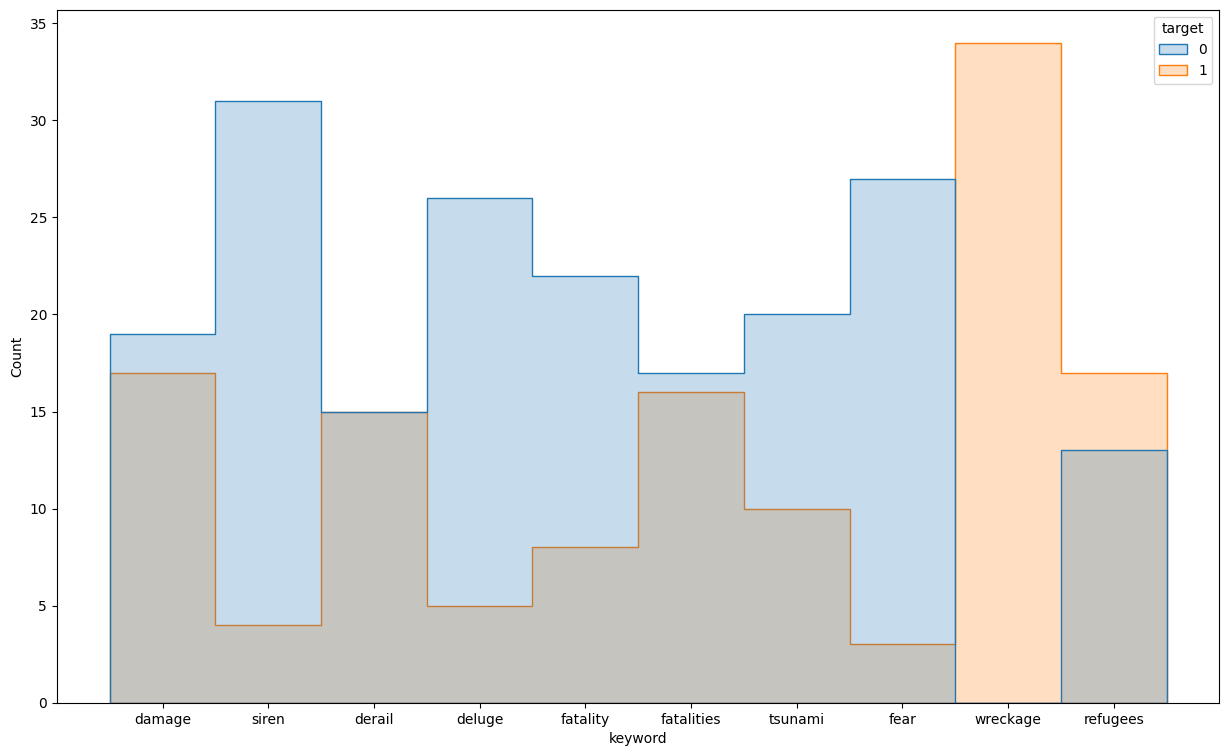

In [ ]:
mostpop = train[train["keyword"].isin(popular_keywords)]
fig, ax = plt.subplots(figsize = (15, 9))
sns.histplot(mostpop, x='keyword', hue = "target", element="step")
plt.show()

**Выводы**: Интерпретируя график, можно сказать, что самым частовстречающимся значением в "keywords" является wreckage, все его упоминания относятся к положительному классу - "в твитте есть информация о катастрофе".

Более того, в большинстве своем в топ-10 наиболее встречающихся значений много таких слов, чье упоминание в твитте не несет информации о катастрофе (может быть твит на другую тему или слова использованы в другом контексте).


## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [ ]:
train["text"] = train["keyword"]+" "+ train["location"]+" "+ train["text"]+" "
train = train.drop(['keyword', "location"], axis=1)
train.loc[[6590, 7122, 2769]]

,id,text,target
6590,9436,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,10203,violent%20storm If you were the NWS wth a rot...,1
2769,3980,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [ ]:
train= train.drop(["id"], axis = 1)
train.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1, 1))
X = vec.fit_transform(train["text"])
X.shape
# размер матрицы - (5329, 18455)

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
list(vec.vocabulary_)[:10]

['bridge',
 '20collapse',
 'ashes',
 '2015',
 'australia',
 'ûªs',
 'collapse',
 'at',
 'trent',
 'among']

In [ ]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from itertools import count
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    ourwords = re.findall(r"\d+", s)
    if len(ourwords) == 0:
      return False
    return True

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    ourwords = re.findall(r'[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]+', s)
    if len(ourwords) == 0:
      return False
    return True

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s.startswith('#')

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s.startswith('@')

def investigate_vocabulary(vocabulary):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for word in vocabulary.keys():
      count1 +=contains_digit(word)
      count2 +=contains_punctuation(word)
      count3 +=is_hashtag(word)
      count4 +=is_mention(word)
    print('With digit:      ', count1
          )
    print('With punctuation:', count2
          )
    print('Hashtags:        ', count3
          )
    print('Mentions:        ', count4
          )




In [ ]:
# dummy_vocab = {'th1nk' : 0,
#                'think333' : 1,
#                'think.' : 2,
#                'th!nk' : 3,
#                'th...nk' : 4,
#                '#think' : 5,
#                '@think' : 6,
#                '@thinking':7,
#                '@nothink' : 8,
#                'think' : 9}
# investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(vec.vocabulary_
                       )

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [ ]:
# -- MY CODE HERE --
tw = TweetTokenizer()
tw_vec = CountVectorizer(tokenizer = tw.tokenize)
tw_matrix= tw_vec.fit_transform(train['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
investigate_vocabulary(tw_vec.vocabulary_
                       )

With digit:       3939
With punctuation: 7335
Hashtags:         1470
Mentions:         1679


In [ ]:
# tw_matrix.shape

(5329, 19670)

**Сравнение:** токенизация смогла распознать хэштеги и упоминания в тексте и вывела их в отличие от предыдущего способа + сильно возрасло количество слов с пунктуацией.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    ourwords = re.findall('[A-Za-z]', s)
    if len(ourwords) == 0:
      return False
    return True

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    if all(i in string.punctuation for i in s) and (any(i in '()' for i in s)):
      return True
    return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    if all(i in '#' for i in s):
      return True
    return False

def custom_tokenizer(s: str) -> List[str]:
    # Кастомный токенайзер-
    raw_texts = TweetTokenizer().tokenize(s.lower())
    stemmer = SnowballStemmer("english")
    done = [stemmer.stem(token) for token in raw_texts if
           ((contains_only_latin_letters(token)==True) or (is_emoji(token) == True) or (is_hashtag(token) == True))
           and token not in stopwords.words('english')]
    return done


In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

In [ ]:
# custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
# -- MY CODE HERE --
for text in range(10):
  print(custom_tokenizer(train["text"].iloc[text]))

['bridg', '20collaps', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia', 'http://t.co/t5trhjuau0']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'b1g', 'thank', '@bmurph1019', '@hail_youtsey', '@termn8r13', '#goblu', '#wrestleon', 'http://t.co/oaskgki6qj']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic', 'http://t.co/di8elzswnr']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', 'http://t.co/yaqrsximph']
['airplan', '20accid', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', 'http://t.co/tagzbcxfj0', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
vectorizer = CountVectorizer(ngram_range = (1,1), tokenizer = custom_tokenizer)
# -- MY CODE HERE --
bow = vectorizer.fit_transform(train['text'])

test['text'] = test["keyword"]+" "+ test["location"]+" "+ test["text"]+" "
test = test.drop(['keyword', "location"], axis=1)
bow_test = vectorizer.transform(test['text'])

2. Обучите LogisticRegression на полученных признаках.


In [ ]:
from sklearn.linear_model import LogisticRegression
# -- MY CODE HERE --
lr = LogisticRegression(random_state = 42)
lr.fit(bow, train['target'])
pred = lr.predict(bow_test)
print(classification_report(test["target"], pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1318
           1       0.79      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
from sklearn.metrics import f1_score

# -- MY CODE HERE --
print("F1 score:", f1_score(test["target"], pred))

F1 score: 0.7559139784946236


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 1
# -- MY CODE HERE --
tfidf_vec = TfidfVectorizer(tokenizer = custom_tokenizer)
X = tfidf_vec.fit_transform(train['text'])
y = tfidf_vec.transform(test['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr_1= LogisticRegression(max_iter=200, random_state=42)
lr_1.fit(X, train["target"])
pred_1 = lr_1.predict(y)
print(classification_report(test['target'], pred_1))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1318
           1       0.79      0.69      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
print("F1 score:", f1_score(test["target"], pred_1))
print("Размер матрицы:", X.shape)

F1 score: 0.735973597359736
Размер матрицы: (5329, 16362)


 **Ответ:** качество модели, обученной tf-idf векторизатором, снизилось.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
# 2
# -- MY CODE HERE --
tfidf_vec = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)
X = tfidf_vec.fit_transform(train['text'])
y = tfidf_vec.transform(test['text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr_2 = LogisticRegression(random_state = 42)
lr_2.fit(X, train['target'])
pred_2 = lr_2.predict(y)
print(classification_report(test["target"], pred_2))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1318
           1       0.79      0.69      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# -- MY CODE HERE --
print("F1 score:", f1_score(test["target"], pred_2))
print("Размер матрицы:", X.shape)

2. **Ответ:** качество модели
и размер матрицы не поменялись

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# -- MY CODE HERE --
hv = HashingVectorizer(ngram_range = (1,1), tokenizer = custom_tokenizer, n_features = 5000)
X = hv.fit_transform(train['text'])
y = hv.transform(test['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lr_3 = LogisticRegression(random_state=42)
lr_3.fit(X, train["target"])
pred_3 = lr_3.predict(y)

In [ ]:
print('F1 score:', f1_score(test['target'], pred_3))
X.shape

F1 score: 0.7166666666666666


(5329, 5000)

2. Какой из подходов показал самый высокий результат?
**Ответ:** самый высокий результат показал CountVectorizer, реализованный с custom_tokenizer, где f1 score равняется примерно 0,76
